In [1]:
import pandas as pd
import scanpy as sc
import glob
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt
import scipy as sp

# Read critical gene tables

In [2]:
def get_ct(data): 
    if(data=="GSE110894"):
        return("Sample name")
    elif(data=="GSE117872_HN120"):
        return("cell_color")
    elif(data=="GSE117872_HN137"):
        return("cell_color")
    else:
        return("leiden")
    
DATA = "GSE110894"
PCT_EXP = 25
ORDER = 'log_fc'

In [3]:
# Change it to your path that sabe h5ad for HN120 critical gene gradient
f_cg = glob.glob("data/*"+DATA+"sc_gradient.txt")
df_cg = pd.read_csv(f_cg[0],sep=" ",header=None)

In [4]:
df_cg.head()

,0,1,2,3,4,5,6,7,8,9,...,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643
0,0.000037,0.000000,0.000073,0.000006,0.000000,-0.000125,0.000050,-0.000000,0.000367,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,0.000058,0.000000,0.000143,0.000010,0.000552,-0.000070,0.000000,-0.000000,0.000559,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,0.000149,0.000000,0.000268,0.000025,0.000000,-0.000000,0.000000,-0.000000,0.001903,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.000041,0.000119,0.000000,0.000009,0.000316,-0.000040,0.000000,-0.000283,0.000600,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0.000052,0.000000,0.000000,0.000009,0.000000,-0.000000,0.000054,-0.000000,0.000503,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


# Read critical gene names

In [5]:
# Change it to your path that sabe h5ad for HN120 critical gene name
f_gn = glob.glob("data/*"+DATA+"sc_gene.csv")
df_gene = pd.read_csv(f_gn[0],index_col=0)

In [6]:
df_gene.head()

,gene_id
0,ENSMUSG00000110331
1,ENSMUSG00000006281
2,ENSMUSG00000029007
3,ENSMUSG00000032026
4,ENSMUSG00000031808


In [7]:
df_cg.columns = df_gene.iloc[:,0].values

# Read result h5ad files

In [8]:
# Change it to your path that sabe h5ad for HN120 cell
adata_fname = glob.glob("D://ws//monocle//review//*"+DATA+"*h5ad")

In [9]:
adata = sc.read_h5ad(adata_fname[0])

In [10]:
adata.obs.head()

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Sensitive_score,Resistant_score,n_genes,...,pct_counts_rps,total_counts_rpl,pct_counts_rpl,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,0.0,0.0,0.0,3,3,0.527935,1,0.000138,0,0.999864
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,0.0,0.0,0.0,3,3,0.676591,1,0.000264,0,0.999738
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,0.0,0.0,0.0,3,3,0.746028,1,0.006229,0,0.993606
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,0.0,0.0,0.0,3,3,0.387372,0,0.000051,0,0.999950
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,0.0,0.0,0.0,3,3,0.493321,0,0.000098,0,0.999904


In [11]:
df_cg.index = adata.obs.index

I select no cliping here because keeping negative value can still calculate the logfc

In [12]:
clip = 'no'
if clip == 'positive':
    df_cg = np.clip(df_cg,a_min=0,a_max=None)
elif clip == 'negative':
    df_cg = abs(np.clip(df_cg,a_min=None,a_max=0))
else:
    df_cg = abs(df_cg)

In [13]:
bdata= sc.AnnData(df_cg)

In [14]:
bdata.obs=adata.obs

In [15]:
df_cg.head()

,ENSMUSG00000110331,ENSMUSG00000006281,ENSMUSG00000029007,ENSMUSG00000032026,ENSMUSG00000031808,ENSMUSG00000024007,ENSMUSG00000063873,ENSMUSG00000028423,ENSMUSG00000028044,ENSMUSG00000048120,...,ENSMUSG00000067242,ENSMUSG00000095186,ENSMUSG00000018341,ENSMUSG00000102817,ENSMUSG00000075569,ENSMUSG00000005800,ENSMUSG00000040809,ENSMUSG00000113035,ENSMUSG00000102390,ENSMUSG00000045662
RPI1_A3,0.000037,0.000000,0.000073,0.000006,0.000000,0.000125,0.000050,0.000000,0.000367,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPI1_A4,0.000058,0.000000,0.000143,0.000010,0.000552,0.000070,0.000000,0.000000,0.000559,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPI1_A5,0.000149,0.000000,0.000268,0.000025,0.000000,0.000000,0.000000,0.000000,0.001903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPI1_A6,0.000041,0.000119,0.000000,0.000009,0.000316,0.000040,0.000000,0.000283,0.000600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPI1_A7,0.000052,0.000000,0.000000,0.000009,0.000000,0.000000,0.000054,0.000000,0.000503,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Sensitive_score,Resistant_score,n_genes,...,ENSMUSG00000046058_gradient,ENSMUSG00000028822_gradient,ENSMUSG00000027247_gradient,ENSMUSG00000034040_gradient,ENSMUSG00000098557_gradient,ENSMUSG00000060703_gradient,ENSMUSG00000005225_gradient,ENSMUSG00000050335_gradient,ENSMUSG00000033737_gradient,ENSMUSG00000001025_gradient
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,0.001628,0.000037,0.000011,0.002085,0.000000,0.000960,0.002528,0.000832,0.001191,0.004963
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,0.001756,0.000032,0.000019,0.000000,0.000000,0.001690,0.000000,0.000000,0.002096,0.000000
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,0.000000,0.000022,0.000022,0.000000,0.000060,0.001867,0.000000,0.000000,0.000000,0.003829
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,0.000000,0.000032,0.000019,0.000000,0.000023,0.000772,0.000000,0.001140,0.001633,0.004860
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,0.000000,0.000032,0.000012,0.002378,0.000000,0.001095,0.002884,0.000000,0.002807,0.002246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P18,RPI7,P18,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,0.000000,0.000018,0.000000,0.000000,0.000050,0.001595,0.000000,0.000000,0.000000,0.000000
RPI7_P19,RPI7,P19,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,0.000000,0.000018,0.000000,0.005530,0.000050,0.002546,0.000000,0.000000,0.000000,0.003410
RPI7_P20,RPI7,P20,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,0.004172,0.000000,0.000029,0.000000,0.000000,0.000000,0.006479,0.000000,0.003051,0.005048
RPI7_P21,RPI7,P21,EMPTY,EMPTY,TATCCGGA,1,Sensitive,-0.295859,1.591129,2012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
igadata= sc.AnnData(df_cg)
igadata.var.index = adata.var.index
igadata.obs.index = adata.obs.index

igadata.obs['sens_label'] = adata.obs['sens_label'].astype('category')

In [18]:
sc.pp.normalize_total(igadata)
sc.pp.log1p(adata)


In [19]:
rg_result = sc.tl.rank_genes_groups(igadata, 'sens_label',pts=True)

In [20]:
igadata.uns['rank_genes_groups']

{'params': {'groupby': 'sens_label',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'pts':                            0         1
 gene_id                               
 ENSMUSG00000110331  0.882779  0.815934
 ENSMUSG00000006281  0.191027  0.118132
 ENSMUSG00000029007  0.452967  0.370879
 ENSMUSG00000032026  0.832127  0.799451
 ENSMUSG00000031808  0.172214  0.157967
 ...                      ...       ...
 ENSMUSG00000005800  0.007236  0.008242
 ENSMUSG00000040809  0.000000  0.004121
 ENSMUSG00000113035  0.008683  0.012363
 ENSMUSG00000102390  0.001447  0.002747
 ENSMUSG00000045662  0.004342  0.001374
 
 [6644 rows x 2 columns],
 'pts_rest':                            0         1
 gene_id                               
 ENSMUSG00000110331  0.815934  0.882779
 ENSMUSG00000006281  0.118132  0.191027
 ENSMUSG00000029007  0.370879  0.452967
 ENSMUSG00000032026  0.799451  0.832127
 ENSMUSG00000031808  0.157967  0.17

In [21]:
resist_g = pd.DataFrame(igadata.uns['rank_genes_groups']['names']).iloc[:,0]
sens_g = pd.DataFrame(igadata.uns['rank_genes_groups']['names']).iloc[:,1]
resist_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]
sens_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,1]
resist_z = pd.DataFrame(igadata.uns['rank_genes_groups']['scores']).iloc[:,0]
sens_z = pd.DataFrame(igadata.uns['rank_genes_groups']['scores']).iloc[:,1]
resist_p = pd.DataFrame(igadata.uns['rank_genes_groups']['pvals_adj']).iloc[:,0]
sens_p = pd.DataFrame(igadata.uns['rank_genes_groups']['pvals_adj']).iloc[:,1]

In [22]:
igadata.uns['rank_genes_groups']["pts"]

,0,1
gene_id,,
ENSMUSG00000110331,0.882779,0.815934
ENSMUSG00000006281,0.191027,0.118132
ENSMUSG00000029007,0.452967,0.370879
ENSMUSG00000032026,0.832127,0.799451
ENSMUSG00000031808,0.172214,0.157967
...,...,...
ENSMUSG00000005800,0.007236,0.008242
ENSMUSG00000040809,0.000000,0.004121
ENSMUSG00000113035,0.008683,0.012363


In [23]:
# resist_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]
# sens_fc = pd.DataFrame(igadata.uns['rank_genes_groups']['logfoldchanges']).iloc[:,0]

In [24]:
sensG_df = pd.DataFrame({"gene_name":sens_g,"log_fc":sens_fc,'zscore':sens_z,'p_adj':sens_p})
resistG_df = pd.DataFrame({"gene_name":resist_g,"log_fc":resist_fc,'zscore':resist_z,'p_adj':resist_p})

In [25]:
sensG_df = sensG_df.sort_values("log_fc",ascending=False)

In [26]:
resistG_df = resistG_df.sort_values("log_fc",ascending=False)

# Actually the DE test can be done once

Because DE bewteen two deg selected groups are just inverse order.

In [27]:
resistG_df

,gene_name,log_fc,zscore,p_adj
2182,ENSMUSG00000044626,16.431038,1.270721,0.321819
788,ENSMUSG00000042284,16.323133,3.596984,0.001459
2329,ENSMUSG00000071226,16.287411,1.123847,0.386818
1001,ENSMUSG00000100417,15.879724,3.138906,0.006030
2375,ENSMUSG00000021373,15.504475,1.077220,0.408823
...,...,...,...,...
5878,ENSMUSG00000051593,-15.732817,-3.633241,0.001287
6092,ENSMUSG00000043313,-16.862503,-4.376510,0.000082
5883,ENSMUSG00000075394,-16.912090,-3.642106,0.001248
6129,ENSMUSG00000104093,-17.663080,-4.527871,0.000044


In [28]:
sensG_df

,gene_name,log_fc,zscore,p_adj
523,ENSMUSG00000038692,17.716423,4.489359,0.000051
514,ENSMUSG00000104093,17.663080,4.527871,0.000044
760,ENSMUSG00000075394,16.912090,3.642106,0.001248
551,ENSMUSG00000043313,16.862503,4.376510,0.000082
765,ENSMUSG00000051593,15.732817,3.633241,0.001287
...,...,...,...,...
4268,ENSMUSG00000021373,-15.504475,-1.077220,0.408823
5642,ENSMUSG00000100417,-15.879724,-3.138906,0.006030
4314,ENSMUSG00000071226,-16.287411,-1.123847,0.386818
5855,ENSMUSG00000042284,-16.323133,-3.596984,0.001459


In [29]:
percentage = igadata.uns['rank_genes_groups']["pts"][igadata.uns['rank_genes_groups']["pts"].max(axis=1)>(PCT_EXP/100)]

In [30]:
percentage

,0,1
gene_id,,
ENSMUSG00000110331,0.882779,0.815934
ENSMUSG00000029007,0.452967,0.370879
ENSMUSG00000032026,0.832127,0.799451
ENSMUSG00000024007,0.700434,0.642857
ENSMUSG00000028423,0.748191,0.641484
...,...,...
ENSMUSG00000072964,0.027496,0.288462
ENSMUSG00000061118,0.206946,0.278846
ENSMUSG00000109418,0.023155,0.255495


In [31]:
sensG_df.to_csv("results/all"+DATA+str(PCT_EXP)+str(ORDER)+".csv")

In [32]:
df_Scg = sensG_df.merge(percentage,left_on="gene_name",right_index=True,how="right").sort_values("log_fc",ascending=False)
df_Scg.columns = ['gene_name', 'log_fc', 'zscore','p_adj', 'pct_exp_rest', 'pct_exp_ct_sens']

In [33]:
df_Scg

,gene_name,log_fc,zscore,p_adj,pct_exp_rest,pct_exp_ct_sens
24,ENSMUSG00000029163,5.200839,18.153048,3.980139e-59,0.024602,0.377747
59,ENSMUSG00000010607,5.053658,13.032450,2.914862e-33,0.435601,0.326923
47,ENSMUSG00000025037,5.051255,14.610629,6.060071e-41,0.013025,0.270604
29,ENSMUSG00000034353,4.958126,17.512070,9.057187e-56,0.026049,0.365385
58,ENSMUSG00000079157,4.856708,13.051756,2.223609e-33,0.031838,0.421703
...,...,...,...,...,...,...
6627,ENSMUSG00000098557,-4.094468,-16.457712,6.339481e-50,0.370478,0.126374
6632,ENSMUSG00000034040,-4.124121,-18.156080,1.281476e-59,0.523878,0.030220
6641,ENSMUSG00000027247,-4.941399,-24.778299,6.300396e-96,0.587554,0.468407
6643,ENSMUSG00000028822,-4.967688,-34.381969,1.029004e-154,0.895803,0.858516


In [34]:
df_Rcg = resistG_df.merge(percentage,left_on="gene_name",right_index=True,how="right").sort_values("log_fc",ascending=False)
df_Rcg.columns = ['gene_name', 'log_fc', 'zscore','p_adj', 'pct_exp_rest', 'pct_exp_ct_sens']

# Visualize expresison on critical gene

In [35]:
adata.obs.sens_label = adata.obs.sens_label.cat.rename_categories({1:"response", 0:"resist"})

In [36]:
adata.obs.sens_label

RPI1_A3     resist
RPI1_A4     resist
RPI1_A5     resist
RPI1_A6     resist
RPI1_A7     resist
             ...  
RPI7_P18    resist
RPI7_P19    resist
RPI7_P20    resist
RPI7_P21    resist
RPI7_P22    resist
Name: sens_label, Length: 1419, dtype: category
Categories (2, object): ['resist', 'response']

In [37]:
list(df_Rcg.gene_name.head(5))+["sens_label",get_ct(DATA)]

['ENSMUSG00000046058',
 'ENSMUSG00000028822',
 'ENSMUSG00000027247',
 'ENSMUSG00000034040',
 'ENSMUSG00000098557',
 'sens_label',
 'Sample name']

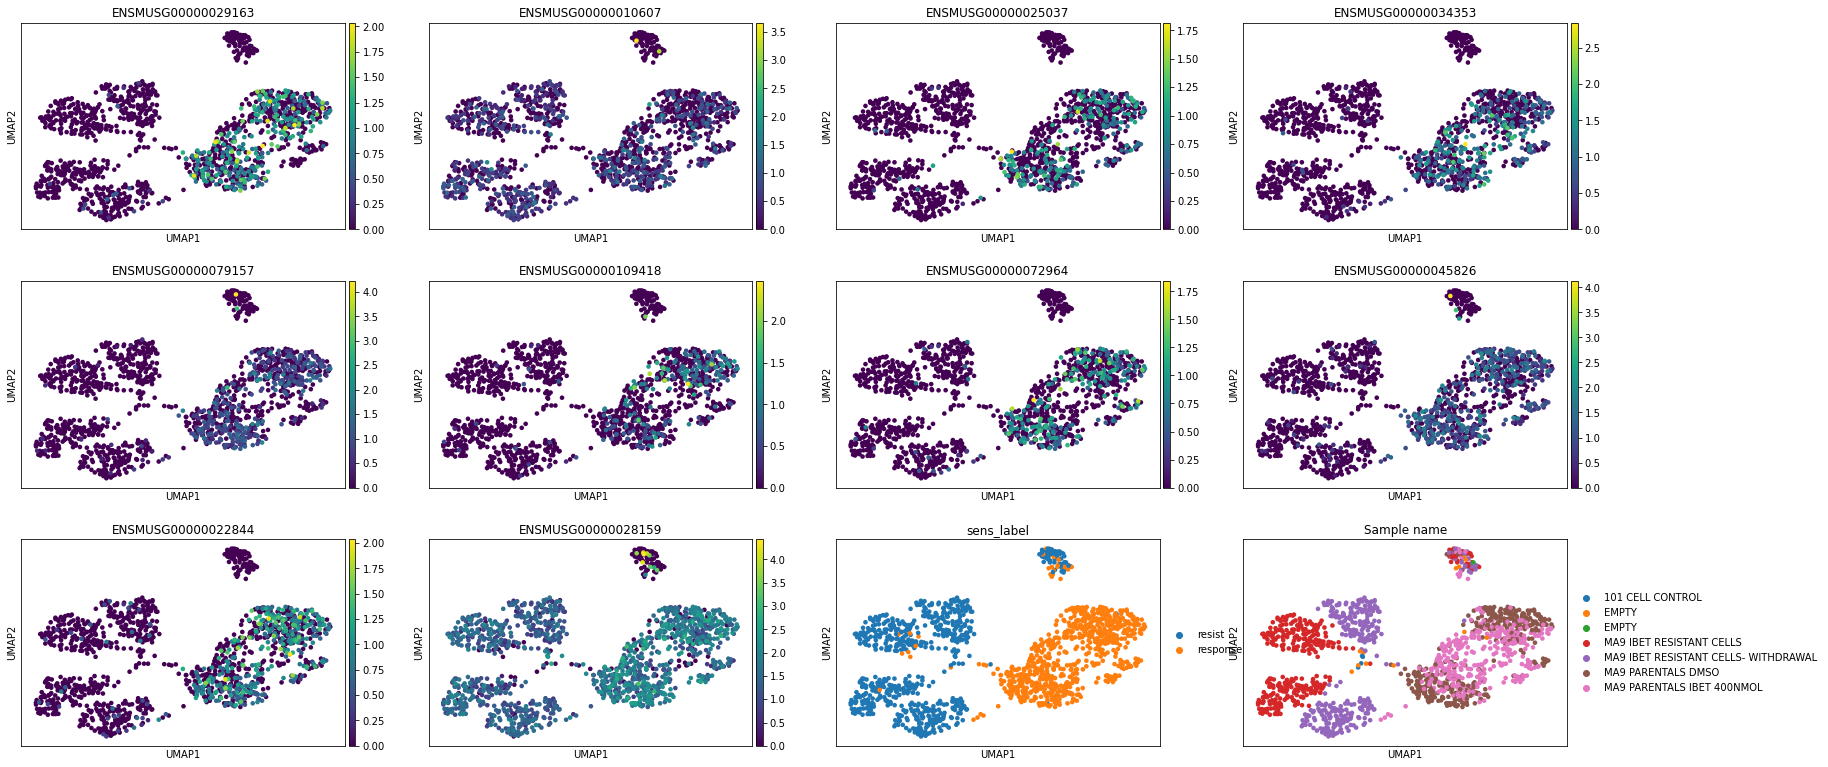

In [38]:
sc.pl.umap(adata,color=list(df_Scg.gene_name.head(10))+["sens_label",get_ct(DATA)])

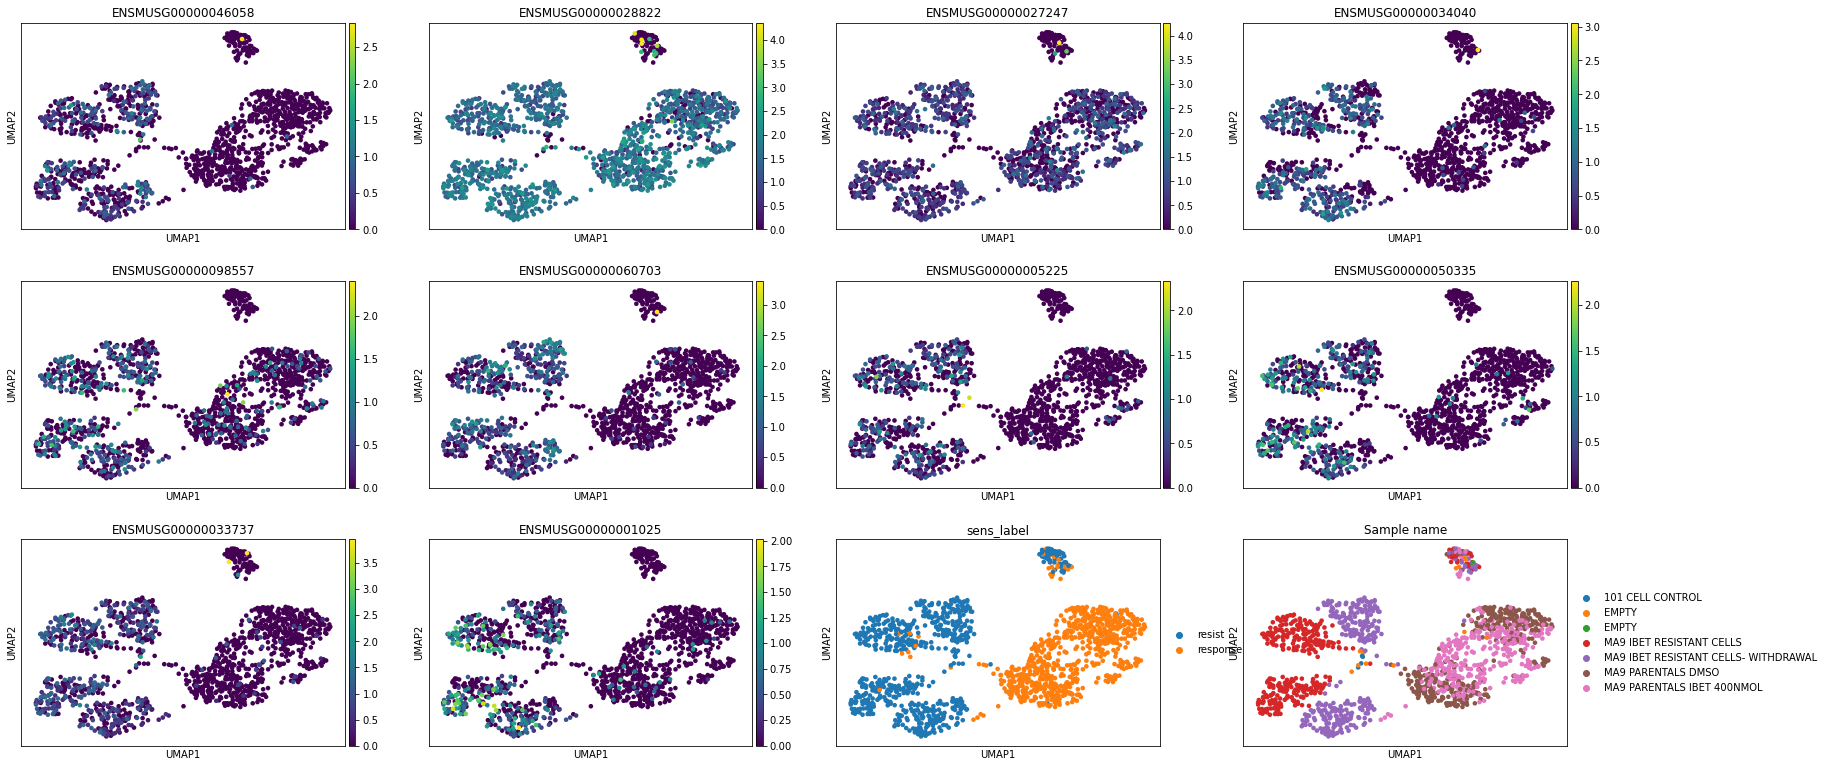

In [39]:
sc.pl.umap(adata,color=list(df_Rcg.gene_name.head(10))+["sens_label",get_ct(DATA)])

# Visualize graident on critical gene

In [40]:
from sklearn.preprocessing import scale

ncgs = 10
gradient_name_s = []
gradient_name_r = []
for i in range(0,ncgs):
    adata.obs[df_Scg.iloc[i,0]+"_gradient"] =igadata[:,df_Scg.iloc[i,0]].X
    gradient_name_s.append(df_Scg.iloc[i,0]+"_gradient")
    
for i in reversed(range(-1*(ncgs),0)):
    adata.obs[df_Scg.iloc[i,0]+"_gradient"] =igadata[:,df_Scg.iloc[i,0]].X
    gradient_name_r.append(df_Scg.iloc[i,0]+"_gradient")

In [41]:
gradient_name_s

['ENSMUSG00000029163_gradient',
 'ENSMUSG00000010607_gradient',
 'ENSMUSG00000025037_gradient',
 'ENSMUSG00000034353_gradient',
 'ENSMUSG00000079157_gradient',
 'ENSMUSG00000109418_gradient',
 'ENSMUSG00000072964_gradient',
 'ENSMUSG00000045826_gradient',
 'ENSMUSG00000022844_gradient',
 'ENSMUSG00000028159_gradient']

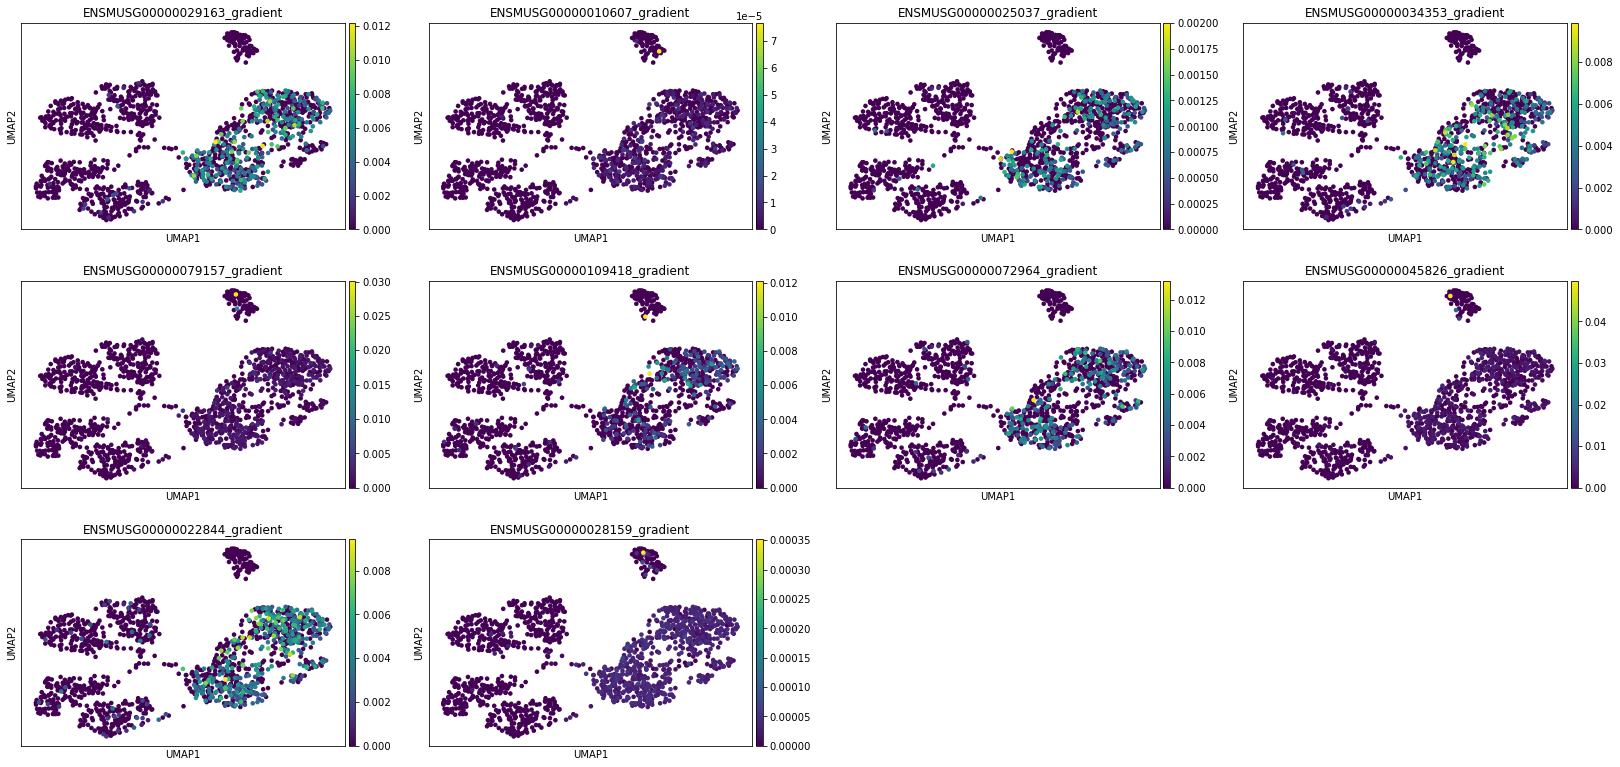

In [42]:
sc.pl.umap(adata,color=gradient_name_s)

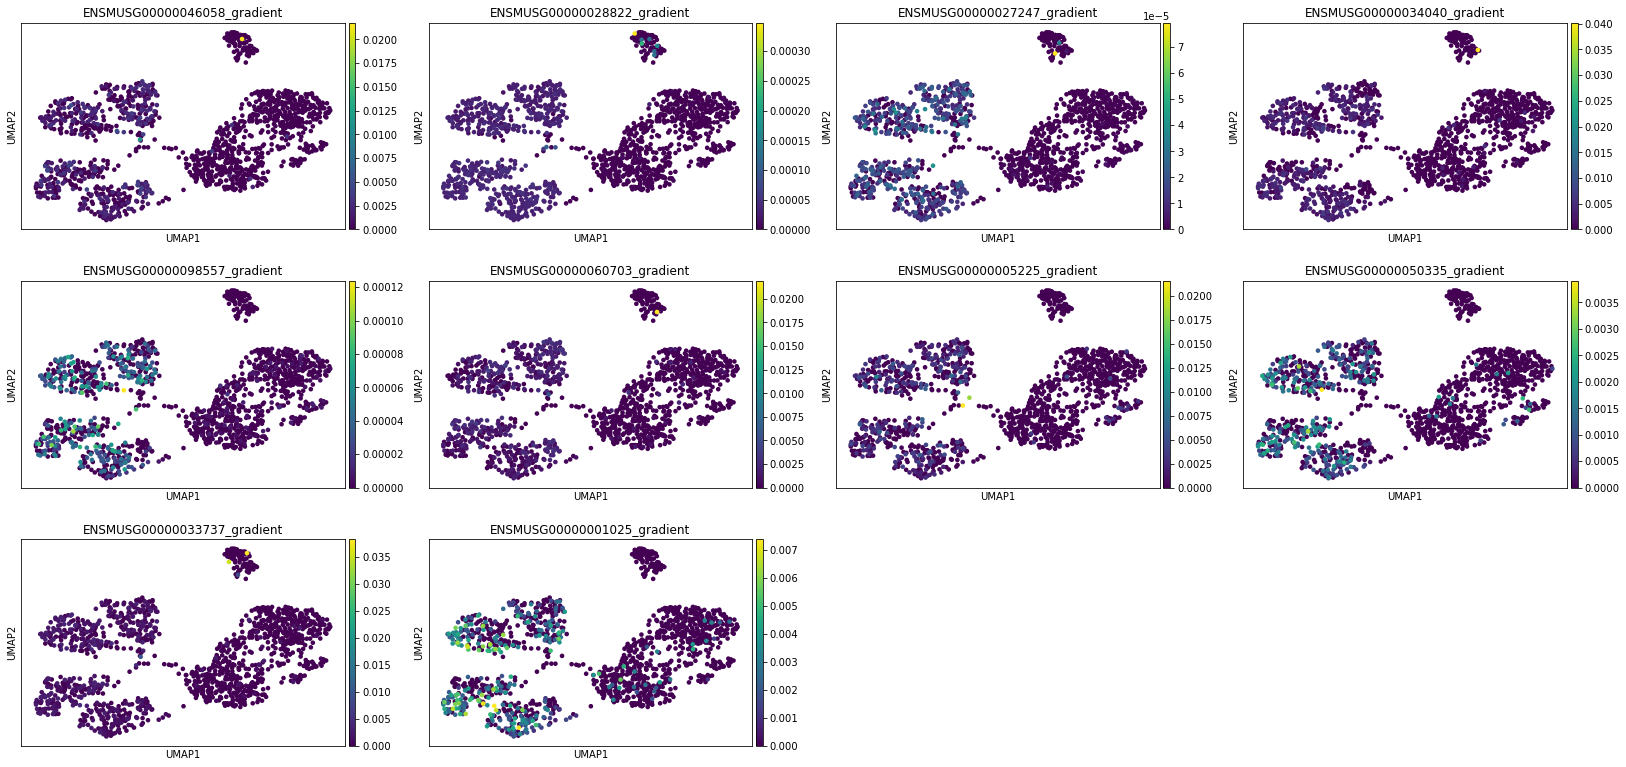

In [43]:
sc.pl.umap(adata,color=gradient_name_r)

In [44]:
df_Rcg.iloc[4,0]

'ENSMUSG00000098557'

In [45]:
df_Rcg.head(10)

,gene_name,log_fc,zscore,p_adj,pct_exp_rest,pct_exp_ct_sens
26,ENSMUSG00000046058,5.207195,14.621176,9.753903e-41,0.374819,0.008242
0,ENSMUSG00000028822,4.967688,34.381969,1.029004e-154,0.895803,0.858516
2,ENSMUSG00000027247,4.941399,24.778299,6.300396e-96,0.587554,0.468407
11,ENSMUSG00000034040,4.124121,18.156080,1.281476e-59,0.523878,0.030220
16,ENSMUSG00000098557,4.094468,16.457712,6.339481e-50,0.370478,0.126374
12,ENSMUSG00000060703,3.958952,17.773657,2.241776e-57,0.547033,0.041209
31,ENSMUSG00000005225,3.891186,13.602711,3.701558e-36,0.342981,0.020604
17,ENSMUSG00000050335,3.840388,16.205421,1.533222e-49,0.393632,0.023352
41,ENSMUSG00000033737,3.781262,11.830843,5.481427e-28,0.515195,0.042582
24,ENSMUSG00000001025,3.179600,14.767056,3.061093e-42,0.383502,0.043956


In [46]:
df_Rcg.loc[
  (df_Rcg.log_fc > 0.25) &
    (df_Rcg.p_adj < 0.05) , "gene_name"
].to_csv("results/"+DATA+"_r.csv",header=False, index=False)

df_Scg.loc[
  (df_Scg.log_fc > 0.25) &
    (df_Scg.p_adj < 0.05) , "gene_name"
].to_csv("results/"+DATA+"_s.csv",header=False, index=False)

df_Rcg.to_csv("results/R"+DATA+str(PCT_EXP)+str(ORDER)+".csv")
df_Scg.to_csv("results/S"+DATA+str(PCT_EXP)+str(ORDER)+".csv")


df_FRcg = df_Rcg.loc[
  (df_Rcg.log_fc > 0.25) &
    (df_Rcg.p_adj < 0.05) , :
]
df_FScg = df_Scg.loc[
  (df_Scg.log_fc > 0.25) &
    (df_Scg.p_adj < 0.05) , :
]


# Plot the regplot between CG and expressions

In [76]:
sgname = []
sgr = []
sgp = []

rgname = []
rgr = []
rgp = []

for i in range(0,10):
    
    g_name = df_FScg.iloc[i,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0
    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws)
    ax.legend()

    sns.despine(left=True)

    plt.savefig("results/r_plots/S_"+str(i)+DATA+g_name+".svg")
    plt.clf()
    
    sgname.append(g_name)
    sgr.append(r)
    sgp.append(p)

    
for i in range(0,10):
    
    g_name = df_FRcg.iloc[i,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0

    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws)
    ax.legend()

    sns.despine(left=True)

    plt.savefig("results/r_plots/R_"+str(i)+DATA+g_name+".svg")
    plt.clf()
    
    rgname.append(g_name)
    rgr.append(r)
    rgp.append(p)

Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


<Figure size 432x288 with 0 Axes>

In [48]:
len(sgname)

10

In [49]:
df_sresult = pd.DataFrame({"gene":sgname,"r":sgr,"p":sgp})
df_sresult['type'] = "response"
df_rresult = pd.DataFrame({"gene":rgname,"r":rgr,"p":rgp})
df_rresult['type'] = "resist"
df_sresult.append(df_rresult).to_csv("results/Regplot"+DATA+str(PCT_EXP)+str(ORDER)+".csv")

In [61]:
adata.obs.sensitivity

RPI1_A3     Resistant
RPI1_A4     Resistant
RPI1_A5     Resistant
RPI1_A6     Resistant
RPI1_A7     Resistant
              ...    
RPI7_P18    Resistant
RPI7_P19    Resistant
RPI7_P20    Resistant
RPI7_P21    Sensitive
RPI7_P22    Resistant
Name: sensitivity, Length: 1419, dtype: category
Categories (2, object): ['Resistant', 'Sensitive']

In [66]:
ig.shape

(1419, 1)

In [69]:
adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp]

RPI1_E2     Sensitive
RPI1_E8     Sensitive
RPI1_E15    Sensitive
RPI1_E16    Sensitive
RPI1_E18    Sensitive
              ...    
RPI7_L3     Sensitive
RPI7_L18    Sensitive
RPI7_L19    Sensitive
RPI7_N18    Resistant
RPI7_N22    Resistant
Name: sensitivity, Length: 206, dtype: category
Categories (2, object): ['Resistant', 'Sensitive']

In [74]:
score_1.shape

(206,)

In [75]:
adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp].shape

(206,)

IndexError: tuple index out of range

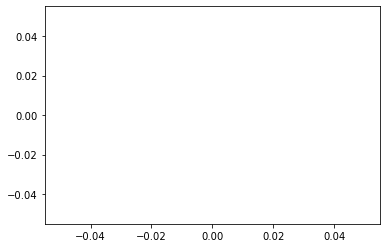

In [72]:
    g_name = df_FScg.iloc[2,0]
    
    ig = igadata[:,g_name].X
    exp = adata[:,g_name].X

    flagnz_ig = ig != 0
    flagnz_exp = exp != 0

    score_1 = ig[flagnz_ig & flagnz_exp]
    score_2 = exp[flagnz_ig & flagnz_exp]

    r, p = sp.stats.pearsonr(score_1, score_2)

    line_kws={'label':"r2={0:.2f}, pval={1:.1E}".format(r,p)}
    scatter_kws = {'color':adata.obs.sensitivity.loc[flagnz_ig & flagnz_exp]}

    ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws,scatter_kws=scatter_kws)
    ax.legend()

    sns.despine(left=True)